## Imports

In [1]:
# basics
import pandas as pd
import seaborn as sns

# utils
import os
import string

# viz
import matplotlib.pyplot as plt

alphabet = string.ascii_lowercase

## Read datasets

In [2]:


root = os.getcwd()
path_data = os.path.join(root, "data")
path_results = os.path.join(root, "results")
path_pij = "pij"
path_url_results = os.path.join(root, path_results)
names = [
    i
    for i in os.listdir(path_data)
    if os.path.isdir(os.path.join(path_data, i))
]

pij = {
    i.replace("_", " ").title(): pd.read_csv(
        os.path.join(path_url_results, i, path_pij, "pij_true.csv")
    )
    for i in names
}
pij_est = {
    i.replace("_", " ").title(): pd.read_csv(
        os.path.join(path_url_results, i, path_pij, "pij_pred.csv"),
        index_col=0,
    )
    for i in names
}
for i in pij:
    try:
        pij[i].drop("Unnamed: 0", axis=1, inplace=True)
        pij_est[i].drop("Unnamed: 0", axis=1, inplace=True)
    except:
        continue

In [3]:


urls = {}
data = {}

for name in names:
    url = os.path.join(path_data, name)
    if os.path.isdir(url):
        urls[name] = os.path.join(path_data, name, name + ".csv")
        data[name] = pd.read_csv(urls[name])

## Plot

/tmp/ipykernel_57426/3331425534.py:14: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.scatterplot(**tmp_params)
/tmp/ipykernel_57426/3331425534.py:14: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.scatterplot(**tmp_params)
/tmp/ipykernel_57426/3331425534.py:14: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(**tmp_params)
/tmp/ipykernel_57426/3331425534.py:14: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.scatterplot(**tmp_params)
/tmp/ipykernel_57426/3331425534.py:14: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.scatterplot(**tmp_params)
/tmp/ipykernel_57426/3331425534.py:14: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.scatterplot(**tmp_params)


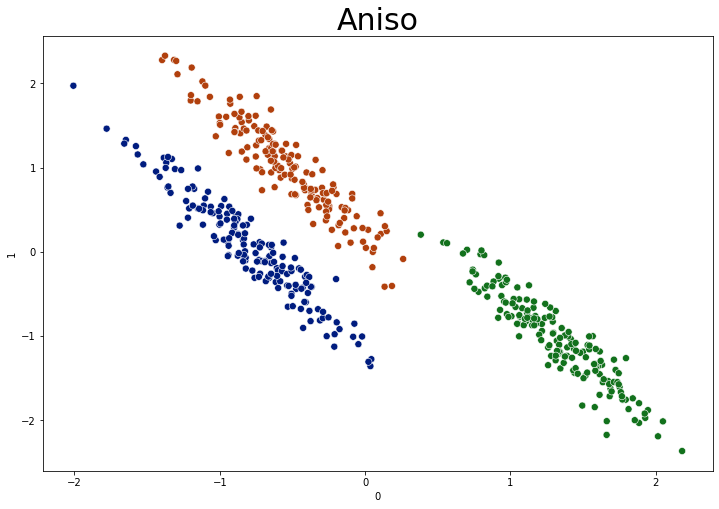

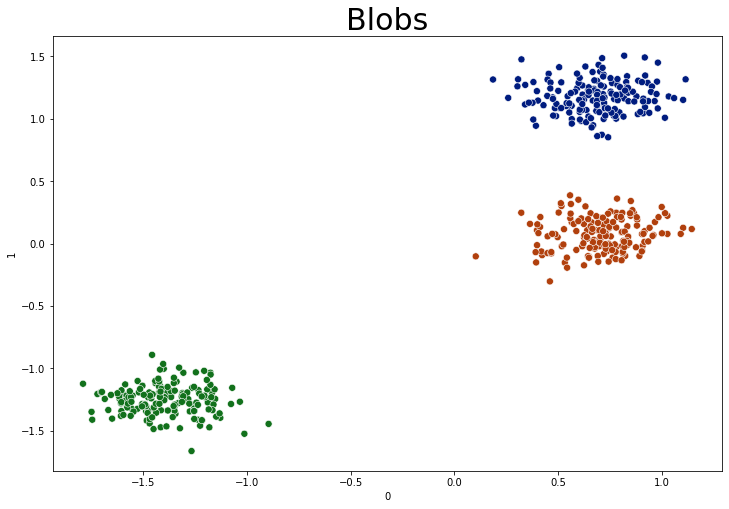

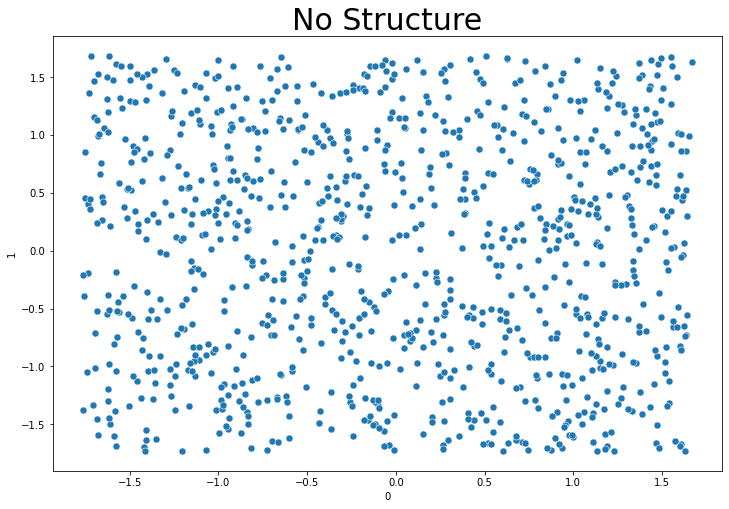

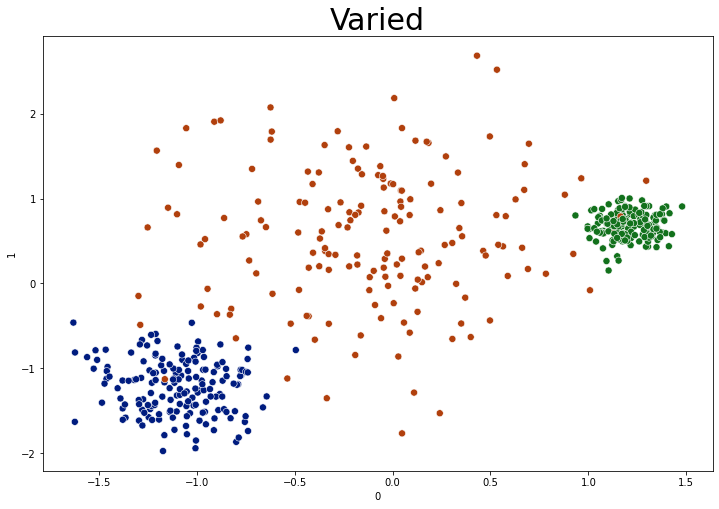

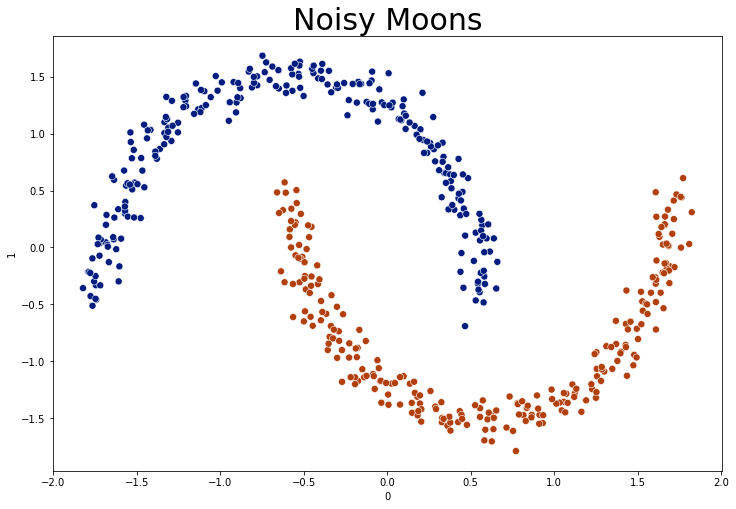

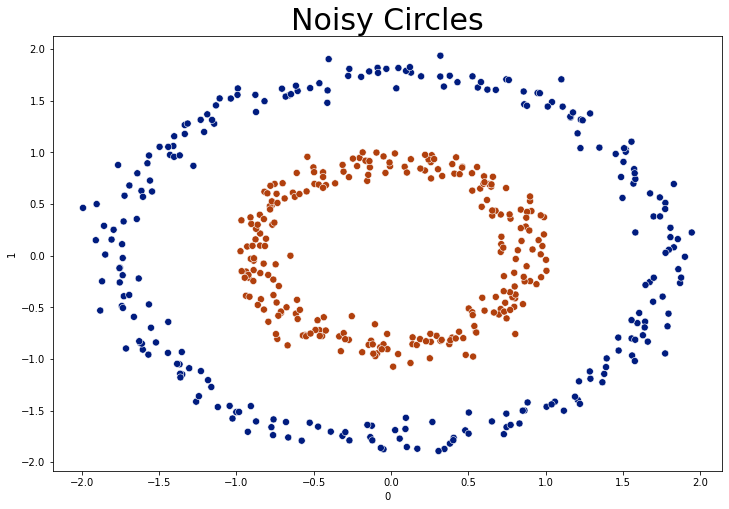

In [4]:
params = {
    "x": "0",
    "y": "1",
    "palette": sns.color_palette("dark"),
    "s": 50,
    "legend": False,
}
for name, url in zip(urls.keys(), urls.values()):
    if "no_structure" == name:
        tmp_params = params | {"data": data[name]}
    else:
        tmp_params = params | {"data": data[name], "hue": "labels"}
    plt.figure(figsize=(12, 8))
    sns.scatterplot(**tmp_params)
    txt = name.replace("_", " ").title()
    plt.title(txt, fontsize=30)
    plt.savefig(url[:(-4)] + ".eps", format="eps")

/tmp/ipykernel_57426/2698564519.py:10: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.scatterplot(
/tmp/ipykernel_57426/2698564519.py:10: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.scatterplot(
/tmp/ipykernel_57426/2698564519.py:10: UserWarning: The palette list has more values (10) than needed (1), which may not be intended.
  sns.scatterplot(
/tmp/ipykernel_57426/2698564519.py:10: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.scatterplot(
/tmp/ipykernel_57426/2698564519.py:10: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.scatterplot(
/tmp/ipykernel_57426/2698564519.py:10: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.scatterplot(


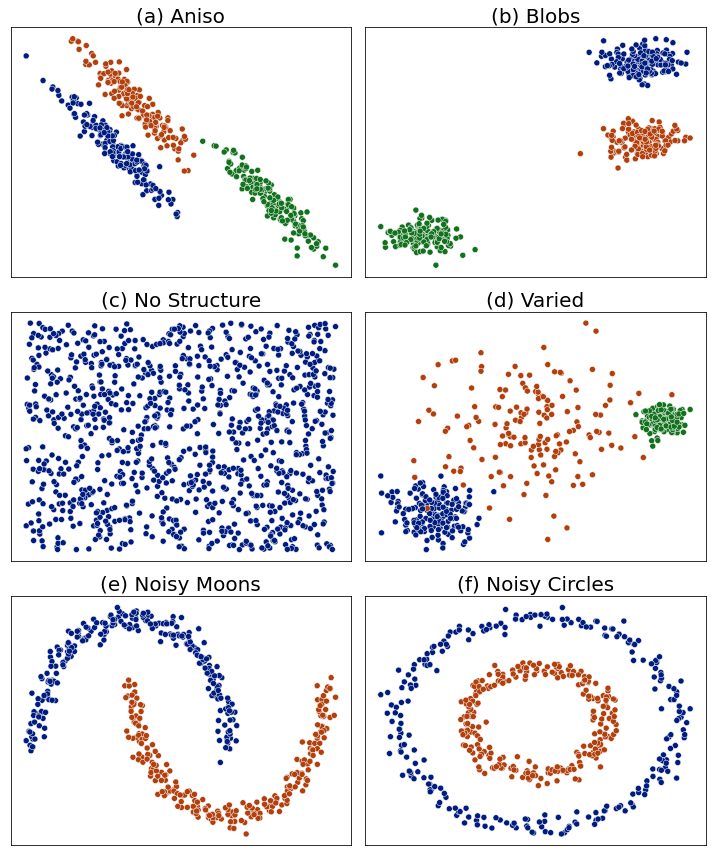

In [5]:
# grid config
fig, axs = plt.subplots(3, 2, figsize=(10, 12))

# Loop
row = 0
col = 0
for letter, (key, iter_data) in zip(alphabet, data.items()):
    if key == "no_structure":
        iter_data.labels = 1
    sns.scatterplot(
        x="0",
        y="1",
        data=iter_data,
        hue="labels",
        ax=axs[row, col],
        palette=sns.color_palette("dark"),
        legend=False,
    )
    axs[row, col].set_title(
        f"({letter}) " + key.replace("_", " ").title(), fontsize=20
    )
    axs[row, col].set_xlabel("")
    axs[row, col].set_ylabel("")
    axs[row, col].set_xticks([])
    axs[row, col].set_yticks([])
    col += 1
    if col == 2:
        col = 0
        row += 1
plt.tight_layout()
plt.savefig(
    os.path.join(path_results, "dataset_distribution_labels.eps"), format="eps"
)

##  $P_{ij}$ distribution

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


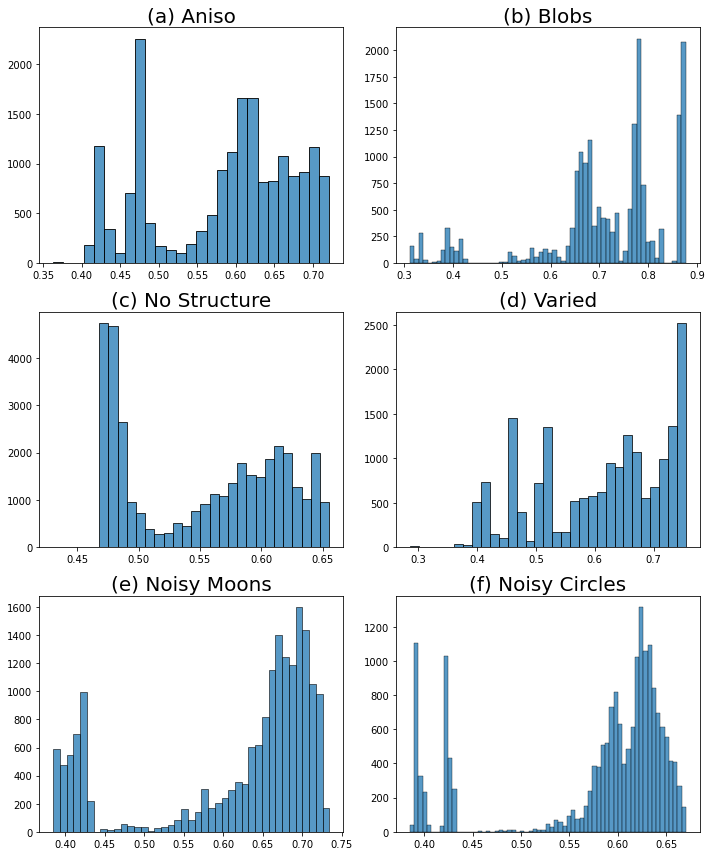

In [6]:


# grid config
fig, axs = plt.subplots(3, 2, figsize=(10, 12))

# Loop
row = 0
col = 0
for letter, (key, iter_data) in zip(alphabet, pij.items()):
    if key == "no_structure":
        iter_data.labels = 1

    sns.histplot(
        iter_data.to_numpy().flatten(),
        ax=axs[row, col],
        # palette=sns.color_palette("dark"),
        legend=False,
    )
    axs[row, col].set_title(
        f"({letter}) " + key.replace("_", " ").title(), fontsize=20
    )
    axs[row, col].set_xlabel("")
    axs[row, col].set_ylabel("")
    col += 1
    if col == 2:
        col = 0
        row += 1
plt.tight_layout()
plt.savefig(os.path.join(path_results, "pij_dataset_distribution_labels.eps"), format="eps")

## $\hat{P}_{ij}$ distribution estimated

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


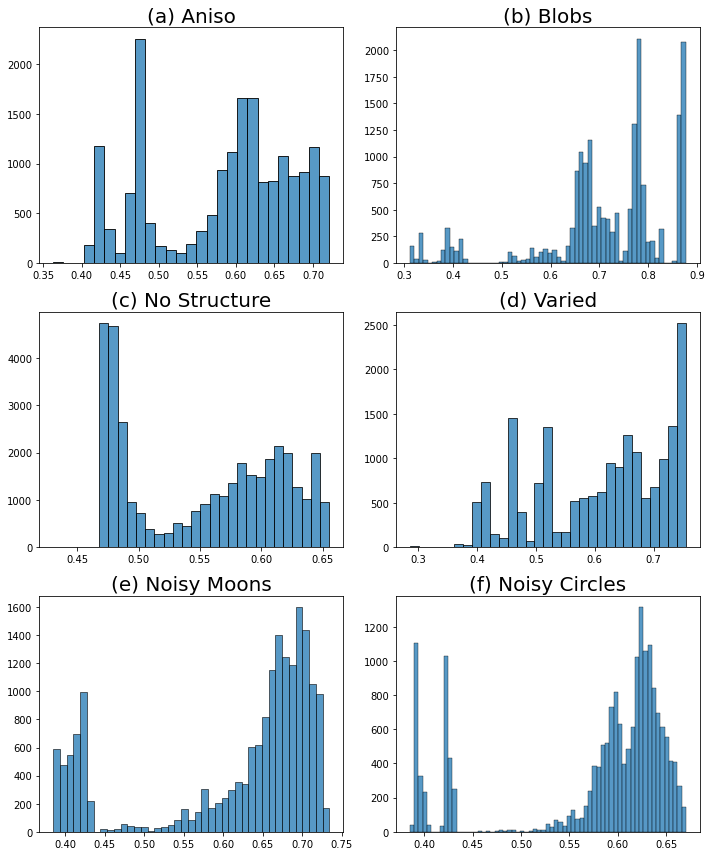

In [7]:
# grid config
fig, axs = plt.subplots(3, 2, figsize=(10, 12))

# Loop
row = 0
col = 0
for letter, (key, iter_data) in zip(alphabet, pij_est.items()):
    if key == "no_structure":
        iter_data.labels = 1

    sns.histplot(
        iter_data.to_numpy().flatten(),
        ax=axs[row, col],
        # palette=sns.color_palette("dark"),
        legend=False,
    )
    axs[row, col].set_title(
        f"({letter}) " + key.replace("_", " ").title(), fontsize=20
    )
    axs[row, col].set_xlabel("")
    axs[row, col].set_ylabel("")
    col += 1
    if col == 2:
        col = 0
        row += 1
plt.tight_layout()
plt.savefig(os.path.join(path_results, "pij_estimated_dataset_distribution_labels.eps"), format="eps")